In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_parquet('../../preprocess/version_1/train.parquet')
train = train.drop(columns=['period'])

In [3]:
train.head()

,ID,category,target,activity,economic_category,road,license,time_from_start,has_insurance,normal_balance,...,days_default_mean_type_4,days_default_mean_type_5,days_default_var_type_1,days_default_var_type_2,days_default_var_type_3,days_default_var_type_4,days_default_var_type_5,count_month,count_product,count_entity
0,5c0d6d516b2f11e55dc7ccf911117c4648efe1e37ba65b...,category_1,0,activity_10,category_3,road_7,no,3.6778,no,no,...,-99999.0,-99999.0,0.780759,-99999.0,0.251037,-99999.0,-99999.0,0.0,2.0,3.0
1,5400f7a37ace9961a211785a78fe36048f652923984801...,category_1,0,activity_1,category_28,road_5,no,2.5808,yes,no,...,-99999.0,-99999.0,-99999.000000,0.0,0.003995,-99999.0,-99999.0,0.0,1.0,1.0
2,5d35f55df443cc3b6d903f12ee1f05a8fa563fef0635c8...,category_1,0,activity_1,category_28,road_3,no,0.3026,yes,yes,...,-99999.0,-99999.0,0.007788,-99999.0,0.000000,-99999.0,-99999.0,0.0,2.0,2.0
3,a6f2cec37995d3a5793ec0e4489c69d396b9e1f80059c1...,category_1,0,activity_10,category_33,road_4,no,3.9883,no,yes,...,-99999.0,-99999.0,0.000000,0.0,0.000000,-99999.0,-99999.0,0.0,3.0,3.0
4,071a27b4ea5c188bebf86cbd8e2a7a910f7abc44023da6...,category_1,0,activity_11,category_31,road_3,no,3.2864,no,yes,...,-99999.0,-99999.0,-99999.000000,-99999.0,0.000000,-99999.0,-99999.0,0.0,1.0,1.0


In [4]:
train['category'].value_counts(normalize=True)

category_1    0.825756
category_3    0.090330
category_2    0.083915
Name: category, dtype: float64

In [5]:
train.groupby(by=['category'])['target'].value_counts(normalize=True)

category    target
category_1  0         0.980872
            1         0.019128
category_2  0         0.615799
            1         0.384201
category_3  0         0.990040
            1         0.009960
Name: target, dtype: float64

In [163]:
test = pd.read_parquet('../../preprocess/version_1/test.parquet')
test = test.drop(columns=['period'])
test['category'].value_counts(normalize=True)

category_1    0.892343
category_2    0.059138
category_3    0.048519
Name: category, dtype: float64

# Analisis Exploratorio

## Analisis univariable - grafico 

In [9]:
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['target']]

In [10]:
categorical_cols = train.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['ID','category','economic_category']]

In [71]:
train[categorical_cols] = train[categorical_cols].astype('category')
test[categorical_cols] = test[categorical_cols].astype('category')

### Variables Numericas - Normal

In [ ]:
for col in numeric_cols:
    sns.violinplot(x ='category', y =col, data = train[train[col]!=-99999.0],
              jitter = True, hue ='target', dodge = True).set(title=f'Distribution of {col}')
    plt.show()

### Variables Numericas - sqrt

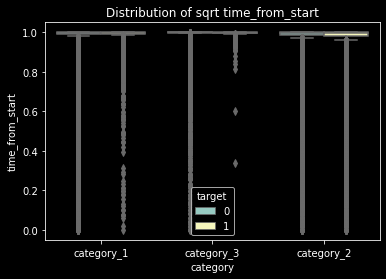

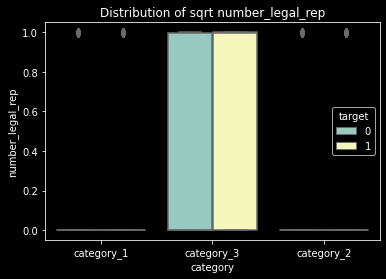

In [10]:
for col in numeric_cols:
    data = train[train[col]!=-99999.0]
    data[col] = np.tanh(data[col])
    sns.violinplot(x ='category', y =col, data = data,
              jitter = True, hue ='target', dodge = True).set(title=f'Distribution of sqrt {col}')
    plt.show()

### Variables Categoricas

In [6]:
df = train.groupby(['period']).agg(concentration_0=pd.NamedAgg(column='taken', aggfunc=concentration_0),).reset_index()
sns.barplot(x="hour",y='concentration_0',data=df).set(title='Hour vs. Concentration of Untaken')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810264 entries, 0 to 810263
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   period             810264 non-null  object
 1   activity           810264 non-null  object
 2   economic_category  810264 non-null  object
 3   road               810264 non-null  object
 4   license            810264 non-null  object
 5   has_insurance      810264 non-null  object
 6   normal_balance     810264 non-null  object
 7   bureau_risk        810264 non-null  object
dtypes: object(8)
memory usage: 55.6+ MB


## Analisis de Correlacion - Asociacion

In [7]:
from dython.nominal import associations
associations(train)

/home/userbda/Proyectos/analisis_calidad/analisis/lib/python3.6/site-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)
/home/userbda/Proyectos/analisis_calidad/analisis/lib/python3.6/site-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)
/home/userbda/Proyectos/analisis_calidad/analisis/lib/python3.6/site-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)
/home/userbda/Proyectos/analisis_calidad/analisis/lib/python3.6/site-packages/dython/nominal.py:139: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  RuntimeWarning)
/home/userbda/Proyectos/analisis_calidad/analisis/lib/python3.6/site-packages/dython/nominal.py:

# Modelo 1 - Catboost

## Modelo por category

In [9]:
train_cat_1 = train[train['category']=='category_1'].reset_index(drop=True)
train_cat_2 = train[train['category']=='category_2'].reset_index(drop=True)
train_cat_3 = train[train['category']=='category_3'].reset_index(drop=True)

### Category_1

In [11]:
from sklearn.model_selection import train_test_split

X_cat_1 = X_cat_1.to_numpy()
y_cat_1 = train_cat_1['target'].to_numpy()
X_train_cat_1, X_test_cat_1, y_train_cat_1, y_test_cat_1 = train_test_split(X_cat_1, y_cat_1, test_size=0.25, random_state=42)

In [12]:
categorical_features_indices

array([0, 1, 2, 3, 4, 6, 7, 8])

In [14]:
from catboost import Pool
from catboost import CatBoostClassifier

cat_1_pool = Pool(data=X_cat_1, label=y_cat_1, cat_features=categorical_features_indices)

In [45]:
from catboost import cv

# parameters for training inside cv:
params_1 = {
    'loss_function': 'Logloss',
    'iterations': 755,
    'custom_loss': 'F1',
    'learning_rate': 0.1,
    'depth':10,
    'scale_pos_weight':10,
    'random_state':42
}

In [15]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-Logloss-mean'].min()
    best_iter = cv_data['test-Logloss-mean'].values.argmin()

    print('Best validation Logloss score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Logloss-std'][best_iter],
        best_iter)
    )

In [26]:
cv_data = cv(
    params = params_1,
    pool = cat_1_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=True,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.002685896146
bestIteration = 528

Training on fold [1/5]

bestTest = 0.00275454998
bestIteration = 726

Training on fold [2/5]

bestTest = 0.002741879034
bestIteration = 608

Training on fold [3/5]

bestTest = 0.0028116916
bestIteration = 65

Training on fold [4/5]

bestTest = 0.002806100169
bestIteration = 173

Best validation Logloss score : 0.0028±0.0001 on step 356


In [37]:
model_cat_1=CatBoostClassifier(iterations=500, depth=7, learning_rate=0.04,scale_pos_weight=12, random_state=42)
model_cat_1.fit(X_train_cat_1, y_train_cat_1,eval_set=(X_test_cat_1, y_test_cat_1),cat_features=categorical_features_indices,plot=True,verbose=False)
#model_cat_1.fit(X_cat_1,y_cat_1,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
pred = model_cat_1.predict(X_cat_1)
train_cat_1['preds'] = pred

#### Evaluacion

In [17]:
from sklearn.metrics import f1_score

def prediccion(df:pd.DataFrame, category_column:str, target_column:str, pred_column):
    cat_counts = []
    f1_scores = []
    categories = df[category_column].unique()
    for cat in categories:
        temp = df[df[category_column]==cat]
        cat_counts.append(len(temp)/len(df))
        f1_scores.append(f1_score(temp[target_column],temp[pred_column]))
    cats = dict(zip(categories,f1_scores,cat_counts))
    return (np.sum(np.array(cat_counts) * np.array(f1_scores)), cats)

In [39]:
f1_score(train_cat_1['target'], train_cat_1['preds'])

0.38057230964582106

In [48]:
f1_score(train_cat_1['target'], train_cat_1['preds'])

0.6472660919901844

#### Calibration

### Category_2

In [16]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

X_cat_2 = train_cat_2.drop(columns=['ID','target'])
categorical_features_indices = np.where(X_cat_2.dtypes == 'category')[0]

In [17]:
X_cat_2 = X_cat_2.to_numpy()
y_cat_2 = train_cat_2['target'].to_numpy()

In [18]:
cat_2_pool = Pool(data=X_cat_2, label=y_cat_2, cat_features=categorical_features_indices)

In [19]:
params_cat_2 = {
    'loss_function': 'Logloss',
    'iterations': 300,
    'custom_loss': 'F1',
    'learning_rate': 0.01,
    'depth':8,
    'scale_pos_weight':2,
    'random_state':42
}

In [20]:
cv_data = cv(
    params = params_cat_2,
    pool = cat_2_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=False,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5602035268
bestIteration = 299

Training on fold [1/5]

bestTest = 0.5617564784
bestIteration = 299

Training on fold [2/5]

bestTest = 0.5642980029
bestIteration = 299

Training on fold [3/5]

bestTest = 0.5622542313
bestIteration = 299

Training on fold [4/5]

bestTest = 0.5662596706
bestIteration = 299

Best validation Logloss score : 0.5630±0.0024 on step 299


In [21]:
model_cat_2=CatBoostClassifier(iterations=299, depth=10, learning_rate=0.1,scale_pos_weight=2, random_state=42)
model_cat_2.fit(X_cat_2, y_cat_2,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
pred = model_cat_2.predict(X_cat_2)
train_cat_2['preds'] = pred

#### Evaluacion

In [24]:
from sklearn.metrics import f1_score

f1_score(train_cat_2['target'], train_cat_2['preds'])

0.7769711960710509

#### Calibration

### Category_3

In [25]:
X_cat_3 = train_cat_3.drop(columns=['ID','target'])
categorical_features_indices = np.where(X_cat_3.dtypes == 'category')[0]

In [26]:
X_cat_3 = X_cat_3.to_numpy()
y_cat_3 = train_cat_3['target'].to_numpy()

In [27]:
cat_3_pool = Pool(data=X_cat_3, label=y_cat_3, cat_features=categorical_features_indices)

In [56]:
params_cat_3 = {
    'loss_function': 'Logloss',
    'iterations': 550,
    'custom_loss': 'F1',
    'learning_rate': 0.008,
    'depth':7,
    'scale_pos_weight':12,
    'random_state':42
}

In [57]:
cv_data = cv(
    params = params_cat_3,
    pool = cat_3_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=True,
    stratified=True,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.222153318
bestIteration = 549

Training on fold [1/5]

bestTest = 0.2111678615
bestIteration = 549

Training on fold [2/5]

bestTest = 0.2135974174
bestIteration = 549

Training on fold [3/5]

bestTest = 0.2129593688
bestIteration = 549

Training on fold [4/5]

bestTest = 0.2053359557
bestIteration = 549

Best validation Logloss score : 0.2130±0.0060 on step 549


In [42]:
model_cat_3=CatBoostClassifier(iterations=300, depth=8, learning_rate=0.01,scale_pos_weight=15, random_state=42)
model_cat_3.fit(X_cat_3, y_cat_3,cat_features=categorical_features_indices,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [43]:
pred = model_cat_3.predict(X_cat_3)
train_cat_3['preds'] = pred

#### Evaluacion

In [44]:
f1_score(train_cat_3['target'], train_cat_3['preds'])

0.4522207267833109

#### Calibration

## Modelo Scikit Optimize

## Prediccion Final

In [74]:
model=CatBoostClassifier(iterations=699, depth=10, learning_rate=0.1,class_weights=[0.95,0.5], random_state=42)
model.fit(train_pool,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [75]:
test = pd.read_parquet('./preprocess/version_1/test.parquet')

In [76]:
test_x = test.drop(columns=['ID']).to_numpy()
pred = model.predict(test_x)
test['target'] = pred
test = test[['ID','target']]

In [77]:
test.to_csv('./entregables/version_1/prediccion_catboost_simple.csv',index=False)

In [78]:
model.save_model('./models/version_1/catboost_simple')

In [ ]:
model = CatBoostClassifier()
model. load_model("./models/version_1/catboost_simple")

# Modelo 2 - XGBoost

In [12]:
categorical_cols

['activity',
 'road',
 'license',
 'has_insurance',
 'normal_balance',
 'bureau_risk']

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough')

transformed = transformer.fit_transform(train)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [72]:
zero = pd.DataFrame([0]*len(test))
test.insert(2, "target", zero)

In [73]:
transformed = transformer.transform(test)
transformed_df_test = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [28]:
train

,ID,category,target,activity,economic_category,road,license,time_from_start,has_insurance,normal_balance,...,days_default_mean_type_4,days_default_mean_type_5,days_default_var_type_1,days_default_var_type_2,days_default_var_type_3,days_default_var_type_4,days_default_var_type_5,count_month,count_product,count_entity
0,5c0d6d516b2f11e55dc7ccf911117c4648efe1e37ba65b...,category_1,0,activity_10,category_3,road_7,no,3.6778,no,no,...,-99999.0,-99999.0,0.780759,-99999.0,0.251037,-99999.0,-99999.0,0.0,2.0,3.0
1,5400f7a37ace9961a211785a78fe36048f652923984801...,category_1,0,activity_1,category_28,road_5,no,2.5808,yes,no,...,-99999.0,-99999.0,-99999.000000,0.0,0.003995,-99999.0,-99999.0,0.0,1.0,1.0
2,5d35f55df443cc3b6d903f12ee1f05a8fa563fef0635c8...,category_1,0,activity_1,category_28,road_3,no,0.3026,yes,yes,...,-99999.0,-99999.0,0.007788,-99999.0,0.000000,-99999.0,-99999.0,0.0,2.0,2.0
3,a6f2cec37995d3a5793ec0e4489c69d396b9e1f80059c1...,category_1,0,activity_10,category_33,road_4,no,3.9883,no,yes,...,-99999.0,-99999.0,0.000000,0.0,0.000000,-99999.0,-99999.0,0.0,3.0,3.0
4,071a27b4ea5c188bebf86cbd8e2a7a910f7abc44023da6...,category_1,0,activity_11,category_31,road_3,no,3.2864,no,yes,...,-99999.0,-99999.0,-99999.000000,-99999.0,0.000000,-99999.0,-99999.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810259,139f0f568bfcd0951c082a41d828fdaf9a89609ce1828e...,category_1,0,activity_6,category_17,road_1,no,2.8261,yes,yes,...,-99999.0,0.0,0.000000,0.0,0.000000,-99999.0,0.0,0.0,3.0,3.0
810260,5374a96d7ec5cc77c1c27a3e134a0279bf0579e3e1438d...,category_1,0,activity_6,category_26,road_5,no,2.9951,yes,yes,...,-99999.0,-99999.0,0.000000,-99999.0,0.000000,-99999.0,-99999.0,0.0,4.0,2.0
810261,d5b4abc3af09b6cb995ac5432547e947467f5500cbec1a...,category_3,0,activity_10,category_33,road_4,no,1.5540,no,yes,...,0.0,-99999.0,-99999.000000,-99999.0,-99999.000000,0.0,-99999.0,-1.0,2.0,1.0
810262,2a99b977be16542e62980b9172192717f9fe006bfc0577...,category_1,0,activity_2,category_4,road_2,no,3.5819,no,yes,...,-99999.0,-99999.0,0.000000,-99999.0,0.000000,-99999.0,-99999.0,0.0,3.0,4.0


In [33]:
transformed_df

,onehotencoder__x0_activity_1,onehotencoder__x0_activity_10,onehotencoder__x0_activity_11,onehotencoder__x0_activity_12,onehotencoder__x0_activity_2,onehotencoder__x0_activity_3,onehotencoder__x0_activity_4,onehotencoder__x0_activity_5,onehotencoder__x0_activity_6,onehotencoder__x0_activity_7,...,days_default_mean_type_4,days_default_mean_type_5,days_default_var_type_1,days_default_var_type_2,days_default_var_type_3,days_default_var_type_4,days_default_var_type_5,count_month,count_product,count_entity
0,0,1,0,0,0,0,0,0,0,0,...,-99999,-99999,0.780759,-99999,0.251037,-99999,-99999,0,2,3
1,1,0,0,0,0,0,0,0,0,0,...,-99999,-99999,-99999,0,0.00399512,-99999,-99999,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,-99999,-99999,0.0077875,-99999,0,-99999,-99999,0,2,2
3,0,1,0,0,0,0,0,0,0,0,...,-99999,-99999,0,0,0,-99999,-99999,0,3,3
4,0,0,1,0,0,0,0,0,0,0,...,-99999,-99999,-99999,-99999,0,-99999,-99999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810259,0,0,0,0,0,0,0,0,1,0,...,-99999,0,0,0,0,-99999,0,0,3,3
810260,0,0,0,0,0,0,0,0,1,0,...,-99999,-99999,0,-99999,0,-99999,-99999,0,4,2
810261,0,1,0,0,0,0,0,0,0,0,...,0,-99999,-99999,-99999,-99999,0,-99999,-1,2,1
810262,0,0,0,0,1,0,0,0,0,0,...,-99999,-99999,0,-99999,0,-99999,-99999,0,3,4


In [74]:
transformed_df_test.drop(columns='target',inplace=True)

In [36]:
train_cat_1 = transformed_df[transformed_df['category']=='category_1'].reset_index(drop=True)
train_cat_2 = transformed_df[transformed_df['category']=='category_2'].reset_index(drop=True)
train_cat_3 = transformed_df[transformed_df['category']=='category_3'].reset_index(drop=True)

In [75]:
test_cat_1 = transformed_df_test[transformed_df_test['category']=='category_1'].reset_index(drop=True)
test_cat_2 = transformed_df_test[transformed_df_test['category']=='category_2'].reset_index(drop=True)
test_cat_3 = transformed_df_test[transformed_df_test['category']=='category_3'].reset_index(drop=True)

In [38]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X_cat_1 = train_cat_1.drop(columns=['ID','target','category','economic_category'])
X_cat_2 = train_cat_2.drop(columns=['ID','target','category','economic_category'])
X_cat_3 = train_cat_3.drop(columns=['ID','target','category','economic_category'])

X_cat_1 = X_cat_1.to_numpy()
y_cat_1 = train_cat_1['target'].to_numpy()
X_train_cat_1, X_test_cat_1, y_train_cat_1, y_test_cat_1 = train_test_split(X_cat_1, y_cat_1, test_size=0.25, random_state=42)

X_cat_2 = X_cat_2.to_numpy()
y_cat_2 = train_cat_2['target'].to_numpy()
X_train_cat_2, X_test_cat_2, y_train_cat_2, y_test_cat_2 = train_test_split(X_cat_2, y_cat_2, test_size=0.25, random_state=42)

X_cat_3 = X_cat_3.to_numpy()
y_cat_3 = train_cat_3['target'].to_numpy()
X_train_cat_3, X_test_cat_3, y_train_cat_3, y_test_cat_3 = train_test_split(X_cat_3, y_cat_3, test_size=0.25, random_state=42)

In [77]:
## PREDICTION

import xgboost as xgb

X_cat_1_test = test_cat_1.drop(columns=['ID','category','economic_category'])
X_cat_1_test = X_cat_1_test.to_numpy()

X_cat_2_test = test_cat_2.drop(columns=['ID','category','economic_category'])
X_cat_2_test = X_cat_2_test.to_numpy()

X_cat_3_test = test_cat_3.drop(columns=['ID','category','economic_category'])
X_cat_3_test = X_cat_3_test.to_numpy()

In [79]:
X_cat_1_test = xgb.DMatrix(X_cat_1_test)
X_cat_2_test = xgb.DMatrix(X_cat_2_test)
X_cat_3_test = xgb.DMatrix(X_cat_3_test)

In [39]:
del zero, transformed_df, transformed_df_test, train, test

## Category 1

In [40]:
from sklearn.metrics import f1_score
import numpy as np

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [41]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_cat_1, label=y_train_cat_1)
dtest = xgb.DMatrix(X_test_cat_1, label=y_test_cat_1)

In [40]:
import optuna
import os

def objective(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "scale_pos_weight":98,
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc

In [41]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(pruner=pruner, direction="maximize")
study.optimize(objective, n_trials=100)

[I 2022-11-04 04:12:34,334] A new study created in memory with name: no-name-fe64a700-f862-4716-bf3f-deea5bd4b122
[I 2022-11-04 04:13:05,435] Trial 0 finished with value: 0.8313406666666667 and parameters: {'booster': 'gblinear', 'lambda': 0.4124151459121904, 'alpha': 0.0011813210933506748}. Best is trial 0 with value: 0.8313406666666667.
[I 2022-11-04 04:24:48,216] Trial 1 finished with value: 0.9111046666666667 and parameters: {'booster': 'dart', 'lambda': 5.63471801053697e-08, 'alpha': 4.4627682094477015e-05, 'max_depth': 6, 'eta': 0.004960127297704421, 'gamma': 0.10314459147475773, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.000943650957262476, 'skip_drop': 1.8182004556722812e-08}. Best is trial 1 with value: 0.9111046666666667.
[I 2022-11-04 04:25:19,175] Trial 2 finished with value: 0.8298503333333334 and parameters: {'booster': 'gblinear', 'lambda': 3.064204454938473e-07, 'alpha': 0.43386018660407794}. Best is trial 1 with va

In [47]:
study.best_trial.params

{'booster': 'gbtree',
 'lambda': 5.275612696534403e-08,
 'alpha': 0.004205108426775527,
 'max_depth': 5,
 'eta': 0.06397265517156524,
 'gamma': 2.037084136696262e-05,
 'grow_policy': 'lossguide'}

In [90]:
# train model:

param = {
        "objective": "binary:logistic",
        "scale_pos_weight":5,
        'booster': 'gbtree',
        "lambda": 5.275612696534403e-08,
        "alpha": 0.004205108426775527,
        'max_depth': 5,
        'eta': 0.06397265517156524,
        'gamma': 2.037084136696262e-05,
        'grow_policy': 'lossguide'
    }

model = xgb.train(param,dtrain,num_boost_round=100)

[03:41:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
pred = model.predict(dtest)

In [92]:
pred

array([0.01522819, 0.00248375, 0.00354085, ..., 0.03897903, 0.20456088,
       0.01145077], dtype=float32)

In [93]:
y_test_cat_1

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
y_test_cat_1 = y_test_cat_1.astype('float64')

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_cat_1, pred)

0.9218248712761363

In [95]:
f1_score(y_test_cat_1, np.round(pred))

0.2836807320793086

In [80]:
pred = model.predict(X_cat_1_test)

In [85]:
test_cat_1['target'] = np.round(pred)

In [86]:
test_cat_1['target'].value_counts()

0.0    289610
1.0      4159
Name: target, dtype: int64

In [87]:
test_cat_1 = test_cat_1[['ID','target']]

In [89]:
test_cat_1.to_csv('../../entregables/version_2/category_1.csv',index=False)

In [ ]:
import pickle
file_name = "./xgboost_models/xgb_cat_1.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))

## Category 2

In [96]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_cat_2, label=y_train_cat_2)
dtest = xgb.DMatrix(X_test_cat_2, label=y_test_cat_2)

In [99]:
import optuna
import os

def objective_cat2(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "scale_pos_weight":trial.suggest_int("scale_pos_weight", 1, 3),
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc

In [100]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(pruner=pruner, direction="maximize")
study.optimize(objective_cat2, n_trials=100)

[I 2022-11-08 03:46:42,250] A new study created in memory with name: no-name-bce790f6-868e-4873-a34a-307427049ff4
[I 2022-11-08 03:47:02,442] Trial 0 finished with value: 0.7778776666666668 and parameters: {'scale_pos_weight': 2, 'booster': 'gbtree', 'lambda': 0.0007605803746321145, 'alpha': 8.302683877257002e-06, 'max_depth': 8, 'eta': 0.1978730667975901, 'gamma': 0.014925322572828744, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.7778776666666668.
[I 2022-11-08 03:48:03,347] Trial 1 finished with value: 0.7617293333333333 and parameters: {'scale_pos_weight': 3, 'booster': 'dart', 'lambda': 4.2611795045846615e-07, 'alpha': 3.8867100870391784e-05, 'max_depth': 2, 'eta': 0.22600855024364924, 'gamma': 2.5445015792723863e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.1435509633798631, 'skip_drop': 1.2183008765227513e-06}. Best is trial 0 with value: 0.7778776666666668.
[I 2022-11-08 03:49:04,552] Trial 2 finished with val

In [101]:
study.best_trial.params

{'scale_pos_weight': 1,
 'booster': 'dart',
 'lambda': 0.22179098520108248,
 'alpha': 0.3195391777371054,
 'max_depth': 9,
 'eta': 0.07124880840645251,
 'gamma': 1.4788270762201107e-05,
 'grow_policy': 'depthwise',
 'sample_type': 'weighted',
 'normalize_type': 'tree',
 'rate_drop': 5.711253366180536e-07,
 'skip_drop': 1.3717797852656553e-05}

In [102]:
# train model:

param = {
        "objective": "binary:logistic",
        'scale_pos_weight': 1,
        'booster': 'dart',
        'lambda': 0.22179098520108248,
        'alpha': 0.3195391777371054,
        'max_depth': 9,
        'eta': 0.07124880840645251,
        'gamma': 1.4788270762201107e-05,
        'grow_policy': 'depthwise',
        'sample_type': 'weighted',
        'normalize_type': 'tree',
        'rate_drop': 5.711253366180536e-07,
        'skip_drop': 1.3717797852656553e-05
    }

model = xgb.train(param,dtrain,num_boost_round=100)

In [103]:
pred = model.predict(dtest)

In [104]:
pred

array([0.12943514, 0.92549247, 0.21786591, ..., 0.81851554, 0.20635498,
       0.08932971], dtype=float32)

In [105]:
y_test_cat_2

array([0, 1, 1, ..., 1, 1, 0], dtype=object)

In [106]:
y_test_cat_2 = y_test_cat_2.astype('float64')

In [107]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_cat_2, pred)

0.7925383617388209

In [108]:
f1_score(y_test_cat_2, np.round(pred))

0.6199015471167371

In [109]:
pred = model.predict(X_cat_2_test)

In [110]:
test_cat_2['target'] = np.round(pred)

In [111]:
test_cat_2['target'].value_counts()

0.0    11112
1.0     8357
Name: target, dtype: int64

In [112]:
test_cat_2 = test_cat_2[['ID','target']]

In [113]:
test_cat_2.to_csv('../../entregables/version_2/category_2.csv',index=False)

## Category 3

In [114]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_cat_3, label=y_train_cat_3)
dtest = xgb.DMatrix(X_test_cat_3, label=y_test_cat_3)

In [115]:
import optuna
import os

def objective_cat3(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "scale_pos_weight":trial.suggest_int("scale_pos_weight", 4, 15),
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc

In [116]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(pruner=pruner, direction="maximize")
study.optimize(objective_cat3, n_trials=100)

[I 2022-11-08 04:32:52,714] A new study created in memory with name: no-name-866b04d9-3217-44f4-b5ee-e171823587f1
[I 2022-11-08 04:33:15,878] Trial 0 finished with value: 0.9008946666666667 and parameters: {'scale_pos_weight': 10, 'booster': 'gbtree', 'lambda': 6.401522192629579e-08, 'alpha': 0.0002263824019742058, 'max_depth': 8, 'eta': 0.10458610353702946, 'gamma': 0.12039506175108736, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9008946666666667.
[I 2022-11-08 04:33:23,983] Trial 1 finished with value: 0.7933336666666667 and parameters: {'scale_pos_weight': 15, 'booster': 'gbtree', 'lambda': 0.38525276757889454, 'alpha': 7.371656817504843e-05, 'max_depth': 2, 'eta': 0.0016402864690520348, 'gamma': 0.0003507305967551104, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9008946666666667.
[I 2022-11-08 04:33:34,392] Trial 2 finished with value: 0.8111246666666667 and parameters: {'scale_pos_weight': 15, 'booster': 'gbtree', 'lambda': 0.0006790555030616603, 'alph

In [117]:
study.best_trial.params

{'scale_pos_weight': 10,
 'booster': 'gbtree',
 'lambda': 5.422545320147603e-08,
 'alpha': 0.7031141272754583,
 'max_depth': 5,
 'eta': 0.16737493735204637,
 'gamma': 0.14682281229705807,
 'grow_policy': 'depthwise'}

In [151]:
# train model:

param = {
        "objective": "binary:logistic",
        'scale_pos_weight': 20,
        'booster': 'gbtree',
        'lambda': 5.422545320147603e-08,
        'alpha': 0.7031141272754583,
        'max_depth': 5,
        'eta': 0.16737493735204637,
        'gamma': 0.14682281229705807,
        'grow_policy': 'depthwise'}

model = xgb.train(param,dtrain,num_boost_round=100)

In [152]:
pred = model.predict(dtest)

In [153]:
pred

array([0.02378887, 0.16046199, 0.00215794, ..., 0.00704754, 0.0063304 ,
       0.00175382], dtype=float32)

In [121]:
y_test_cat_3

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [122]:
y_test_cat_3 = y_test_cat_3.astype('float64')

In [149]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_cat_3, pred)

0.9138617148090873

In [154]:
f1_score(y_test_cat_3, np.round(pred))

0.342042755344418

In [155]:
pred = model.predict(X_cat_3_test)

In [156]:
test_cat_3['target'] = np.round(pred)

In [157]:
test_cat_3['target'].value_counts()

0.0    15774
1.0      199
Name: target, dtype: int64

In [158]:
test_cat_3 = test_cat_3[['ID','target']]

In [159]:
test_cat_3.to_csv('../../entregables/version_2/category_3.csv',index=False)

In [160]:
for i in range(1,4):
    print(i)

1
2
3


# Prediccion Final

In [161]:
prediccion_final = pd.concat(
                            [pd.read_csv(f'../../entregables/version_2/category_{i}.csv') for i in  range(1,4)
                            ]).reset_index(drop=True)

In [162]:
prediccion_final

,ID,target
0,669c9da570306d5124c865db91a459fb245e80d39043dd...,0.0
1,177b7e415e558c22d6bf675567755d61bb6f8b69c671f6...,0.0
2,371352ffefb1695cb7aa844e0bb48009ba43f0988c9c39...,0.0
3,27e752493fd4534762870e1f85fc6f7e0d31e597b6c918...,0.0
4,6f993c79a43888e4b742fdc3a63b308f3395d990db4c75...,0.0
...,...,...
329206,483332dfd1d1ddbf0a43f819a280da697730284cd873c4...,0.0
329207,c449274add30f09ce7bd6788605bc6be329782f8f75b86...,0.0
329208,e3c9a2f7ca96445bbd74e3d49ce4bee9f8884e1517b639...,0.0
329209,bbe20638ee9fd89adfc5c43e1fdf243507f61b584312b0...,0.0


In [165]:
prediccion_final.to_csv('../../entregables/version_2/prediccion_xgboost_v2.csv',index=False)